EDA PROYECTO INDIVIDUAL - NESTOR FABIO CARDONA

In [14]:
import requests
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt


LAS 10 CRIPTOMONEDAS MÁS USADAS Y COTIZADAS PARA EL AÑO 2023
id de monedas seleccionadas = bitcoin,ethereum,binancecoin,cardano,solana,polkadot,uniswap,tether,ripple, dogecoin  

INFORMACION CARGADA DE LA API COINGECKO : 5 AÑOS TOMADOS DEL 2018/8/9 AL 2023/8/9 SON 1796 DIAS
# CARGAMOS LA INFORMACION HISTORICA SOLO EN DOLARES AMERICANOS #

In [ ]:
''' 
CARGAMOS LA INFORMACION HISTORICA SOLO EN DOLARES AMERICANOS DESDE LA API

id de monedas seleccionadas = bitcoin,ethereum,binancecoin,cardano,solana,
polkadot,uniswap,tether,ripple, dogecoin.

Se crean 10 archivos uno por cada criptomoneda, a los cuales se les convierte 
el timestand que es fecha en formato UNIX a formato fecha YYYY-MM-DD y se le 
agrega el campo id 
'''

# URL de la API de Coingecko
url = "https://api.coingecko.com/api/v3/coins/dogecoin/market_chart/range"

# Parámetros de la consulta
params = {
    'vs_currency': 'usd',
    'from': 1533792000, # 9-agosto-2018
    'to': 1689014400,   # 9-agosto-2023
    'precision': '4'
}

# Realizar la solicitud HTTP
response = requests.get(url, params=params)

# Convertir la respuesta JSON en un DataFrame de Pandas
data = response.json()
df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])

# Convertir el timestamp a formato de fecha y hora
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Agregar una columna con el valor "binancecoin"
valor = 'dogecoin'
df['id'] = valor

nombre_archivo = 'dogecoin.csv'
df.to_csv(nombre_archivo, index=False)

print(df)


In [6]:
''' 
CARGAMOS LA INFORMACION HISTORICA SOLO EN DOLARES AMERICANOS DESDE ARCHIVOS DE LA API COINGECKO

Abrimos el archivo historico por cada criptomoneda que viene en .JSON y lo pasamos a Pandas
para depurarlo y le agragamos el id.

Los archivos son market_bitcoin, market_binancecoin, market_cardano, market_dogecoin, 
market_ethereum, market_polkadot, market_ripple, market_solana, market_tether, market_uniswap

Se crean 10 archivos uno por cada criptomoneda, a los cuales se les convierte 
el timestand que es fecha en formato UNIX a formato fecha YYYY-MM-DD y se le 
agrega el campo id 
'''

# Crear un DataFrame a partir del JSON proporcionado por la API CoinGecko
json_filename = 'market_uniswap.json'

with open(json_filename, 'r') as json_file:
    data = json.load(json_file)

df_market = pd.DataFrame(data)

'''
id de monedas seleccionadas = bitcoin,ethereum,binancecoin,cardano,solana,
polkadot,uniswap,tether,ripple, dogecoin.
Agregar una columna con el valor "id de la criptomoneda"
'''
valor = 'uniswap'
df_market['id'] = valor

# Función para convertir timestamp UNIX a formato yyyy-mm-dd
def convertir_timestamp(timestamp):
    timestamp_millis = int(timestamp)
    fecha = datetime.datetime.utcfromtimestamp(timestamp_millis / 1000.0)
    return fecha.strftime('%Y-%m-%d')

# Función para convertir cadena (price, market_caps, total_volumes) a float
def convertir_a_float(cadena):
    return float(cadena)

# conversiones y depuracion final del dataframe
for index, row in df_market.iterrows():
    prices_data = row['prices']
    market_caps_data = row['market_caps']
    total_volumes_data = row['total_volumes']

    df_market.at[index, 'fecha'] = convertir_timestamp(prices_data[0])
    df_market.at[index, 'price'] = convertir_a_float(prices_data[1])
    df_market.at[index, 'fecha2'] = convertir_timestamp(market_caps_data[0])
    df_market.at[index, 'market_cap'] = convertir_a_float(market_caps_data[1])
    df_market.at[index, 'fecha3'] = convertir_timestamp(total_volumes_data[0])
    df_market.at[index, 'total_volume'] = convertir_a_float(total_volumes_data[1])


# BORRAMOS COLUMNAS NO NECESARIAS Y RENOMBRAMOS COLUMNAS NUEVAS y guardamos en archivo csv

# Borrar las columnas
columnas_a_borrar = ['prices', 'market_caps', 'total_volumes', 'fecha2','fecha3']
df_market = df_market.drop(columns=columnas_a_borrar)

# Renombrar las columnas
nombres_nuevos = {'price': 'prices', 'market_cap': 'market_caps', 'total_volume': 'total_volumes'}
df_market = df_market.rename(columns=nombres_nuevos)

# Guardamos archivo csv
nombre_archivo = 'uniswap_m.csv'
df_market.to_csv(nombre_archivo, index=False)

# Mostrar el DataFrame resultante
print(df_market)


           id       fecha  prices   market_caps  total_volumes
0     uniswap  2020-09-17  3.4438  2.199132e+08   1.802085e+09
1     uniswap  2020-09-18  3.4438  2.199132e+08   1.802085e+09
2     uniswap  2020-09-19  7.0977  7.328221e+08   5.688408e+09
3     uniswap  2020-09-20  5.7021  6.472084e+08   2.050756e+09
4     uniswap  2020-09-21  5.2566  6.324213e+08   1.316669e+09
...       ...         ...     ...           ...            ...
1055  uniswap  2023-08-08  5.8630  4.416776e+09   1.036292e+08
1056  uniswap  2023-08-09  6.0898  4.592248e+09   1.048953e+08
1057  uniswap  2023-08-10  6.2700  4.728469e+09   1.054968e+08
1058  uniswap  2023-08-11  6.1898  4.665684e+09   9.424529e+07
1059  uniswap  2023-08-11  6.1908  4.668274e+09   8.859715e+07

[1060 rows x 5 columns]


EDA PARA LA CRIPTOMONEDA BINANCECOIN (SIYMBOL BNB) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS, 
LA CURVA ASCENDENTE DE LAS GRAFICAS CORRESPONDE AL COMPORTAMIENTO DE 
CRECIMIENTO DE LA MONEDA EN LOS ULTIMOS AÑOS Y EN CUANTO A VOLUMENES TOTALES
SU COMPORTAMIENTO ES MUY ESTABLES, REFLEJANDO LA REALIDAD DE LA MONEDA.

            id       fecha  prices   market_caps  total_volumes
0  binancecoin  2018-09-11  9.5112  9.304530e+08   1.393417e+07
1  binancecoin  2018-09-12  9.3482  9.164226e+08   2.138069e+07
2  binancecoin  2018-09-13  9.2029  8.790186e+08   2.273415e+07
3  binancecoin  2018-09-14  9.6137  9.187470e+08   2.626998e+07
4  binancecoin  2018-09-15  9.9224  9.482291e+08   2.747945e+07


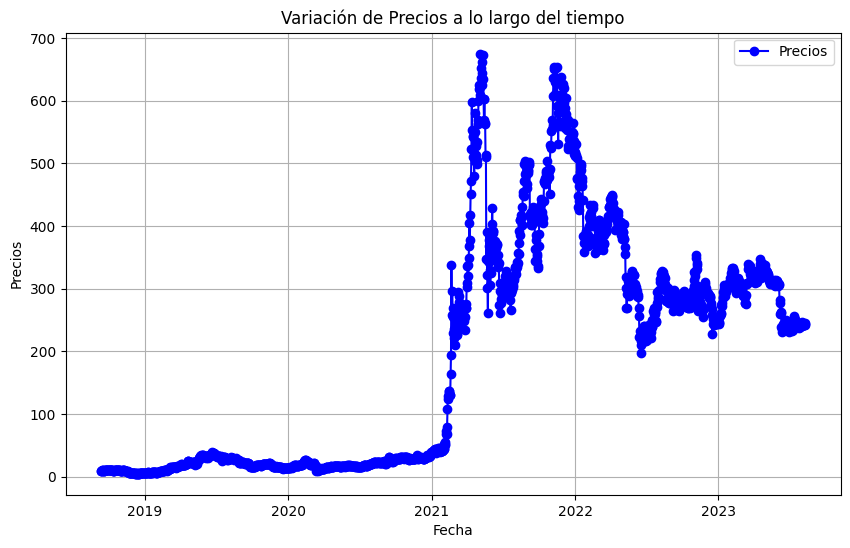

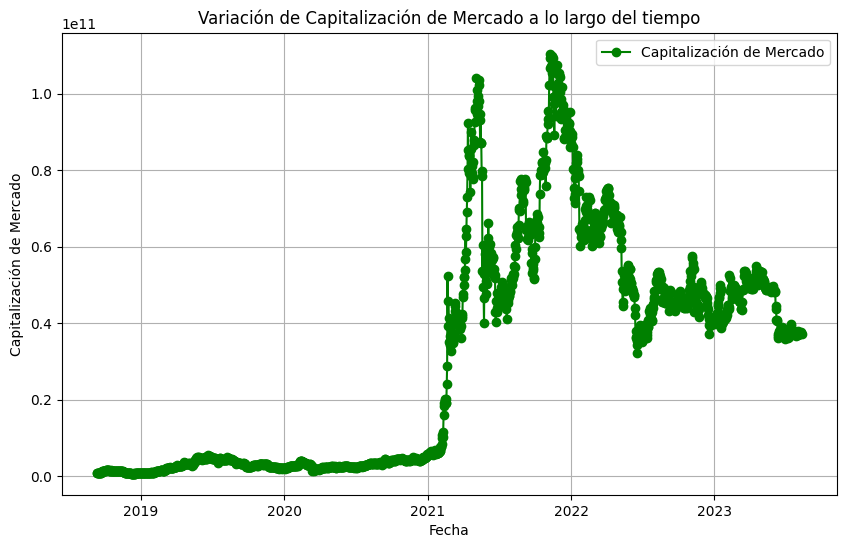

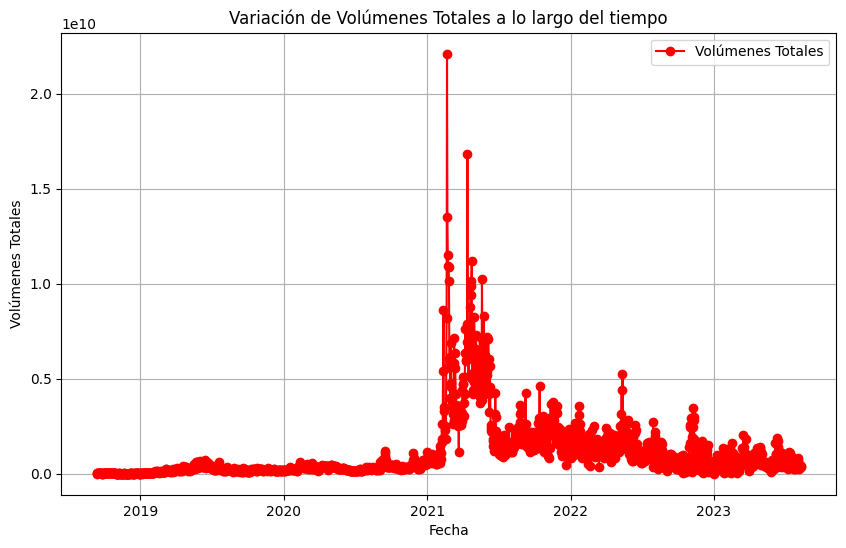

In [23]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('binancecoin_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA BITCOIN (SIYMBOL BTC) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS
LOS PICOS DE VALORIZACION CORRESPONDE AL COMPORTAMIENTO PICO DE LA MONEDA EN 2022
LUEGO LA CAIDA MODERADA EN 2023.

        id       fecha     prices   market_caps  total_volumes
0  bitcoin  2018-09-10  6260.7648  1.082191e+11   4.174630e+09
1  bitcoin  2018-09-11  6308.1355  1.088462e+11   4.504627e+09
2  bitcoin  2018-09-12  6278.9171  1.084492e+11   5.001529e+09
3  bitcoin  2018-09-13  6330.5742  1.092986e+11   5.026517e+09
4  bitcoin  2018-09-14  6486.4616  1.121245e+11   4.987197e+09


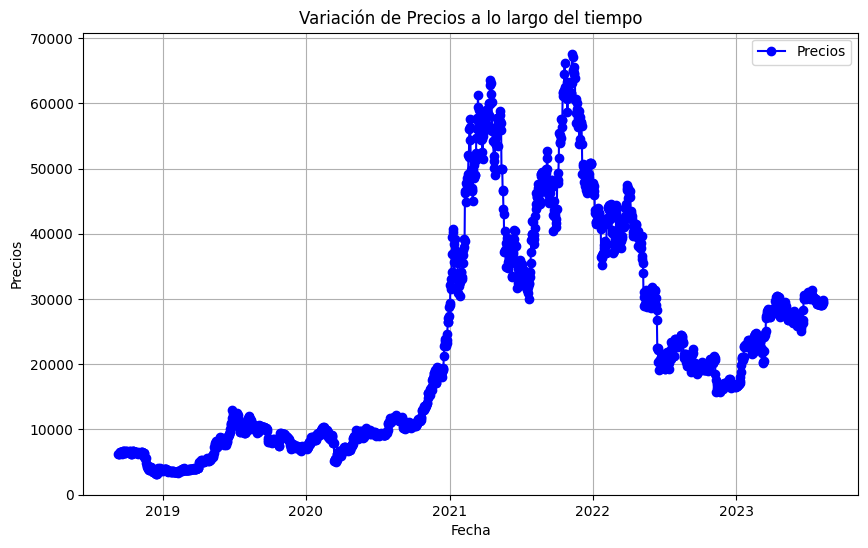

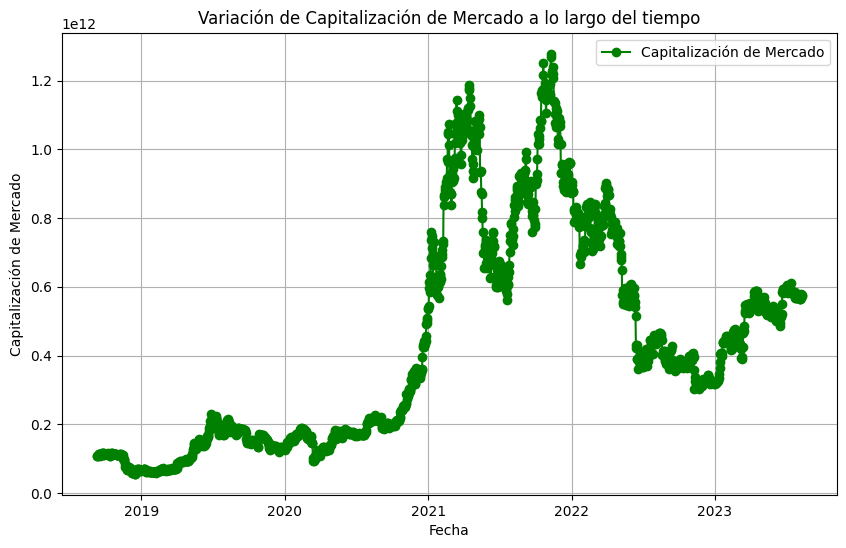

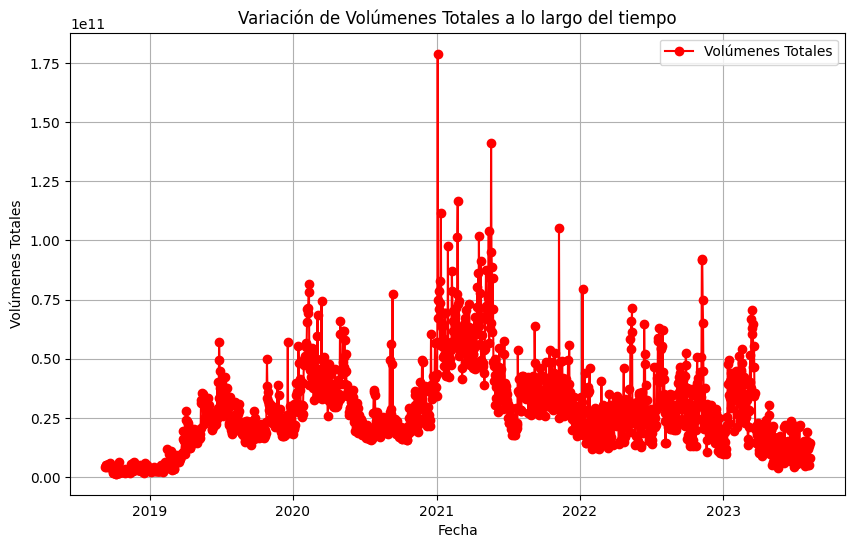

In [22]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('bitcoin_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA CARDANO (SIYMBOL ADA) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS
LOS AUMENTOS DE FINALES DEL 2021 SON LOS COMPORTAMIENTOS REALES
DE LA CRIPTOMONEDA EN ESOS

        id       fecha  prices   market_caps  total_volumes
0  cardano  2018-09-11  0.0734  2.281646e+09   5.174544e+07
1  cardano  2018-09-12  0.0702  2.186172e+09   5.952427e+07
2  cardano  2018-09-13  0.0666  2.073258e+09   1.105276e+08
3  cardano  2018-09-14  0.0699  2.176534e+09   9.833378e+07
4  cardano  2018-09-15  0.0681  2.124660e+09   7.415165e+07


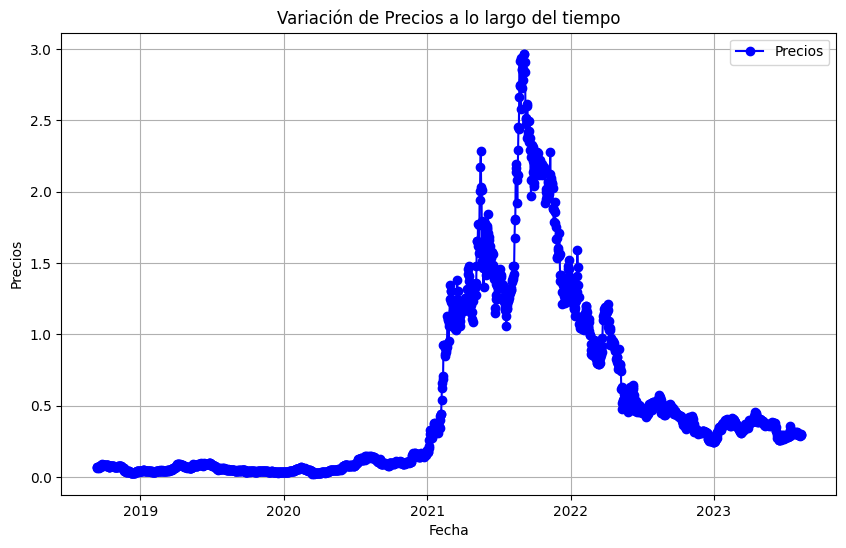

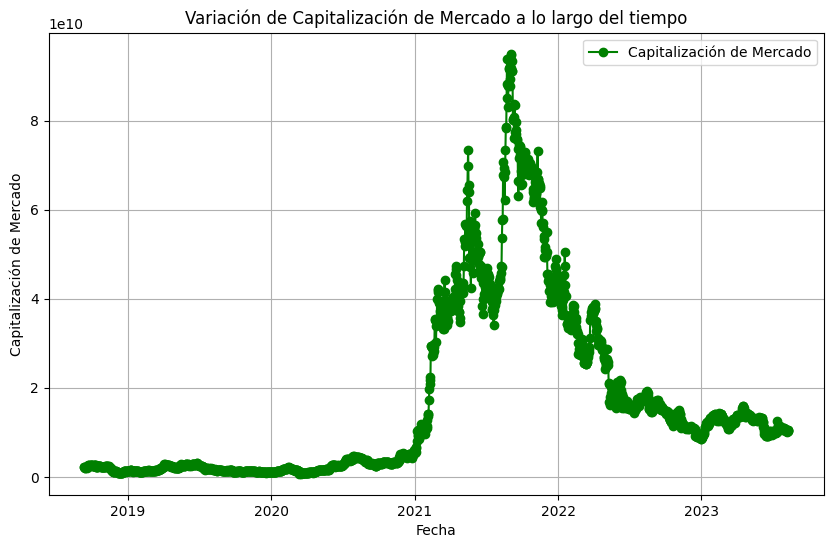

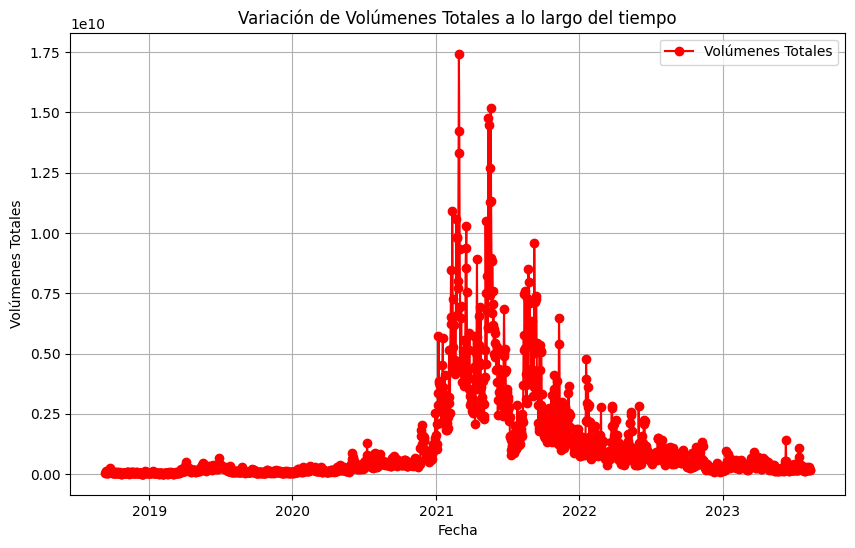

In [20]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('cardano_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA DOGECOIN (SIYMBOL DOGE) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS
EL PICO DE 2021 AÑO DONDE TUVO SU MAYOR CRECIMIENTO, REFLEJA EL MOVIMIENTO
DE LA CRIPTO QUE DECRECIO PARA 2022 Y CONTINUA CON UN COMPORTAMIENTO ESTABLE HASTA LA FECHA

         id       fecha  prices   market_caps  total_volumes
0  dogecoin  2018-09-11  0.0069  7.994710e+08   1.174560e+08
1  dogecoin  2018-09-12  0.0063  7.326432e+08   1.329765e+08
2  dogecoin  2018-09-13  0.0064  7.488661e+08   9.245719e+07
3  dogecoin  2018-09-14  0.0066  7.606779e+08   8.192994e+07
4  dogecoin  2018-09-15  0.0062  7.174199e+08   6.938966e+07


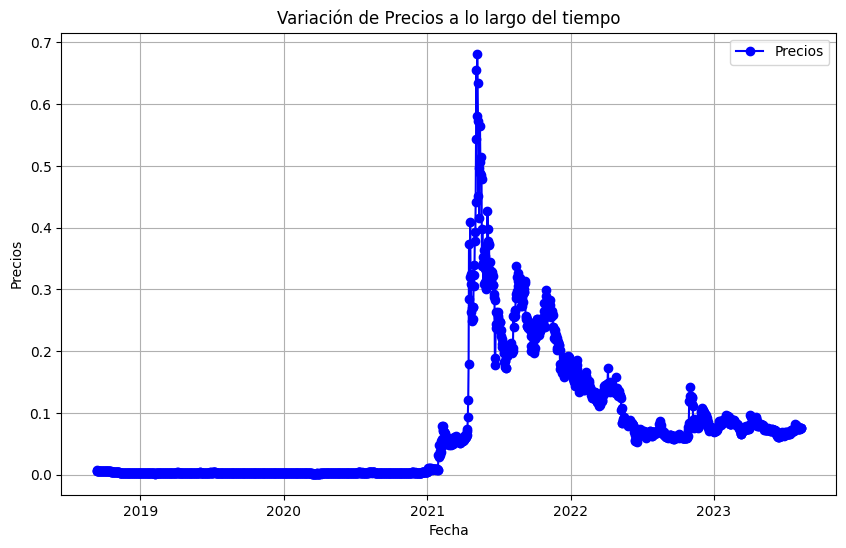

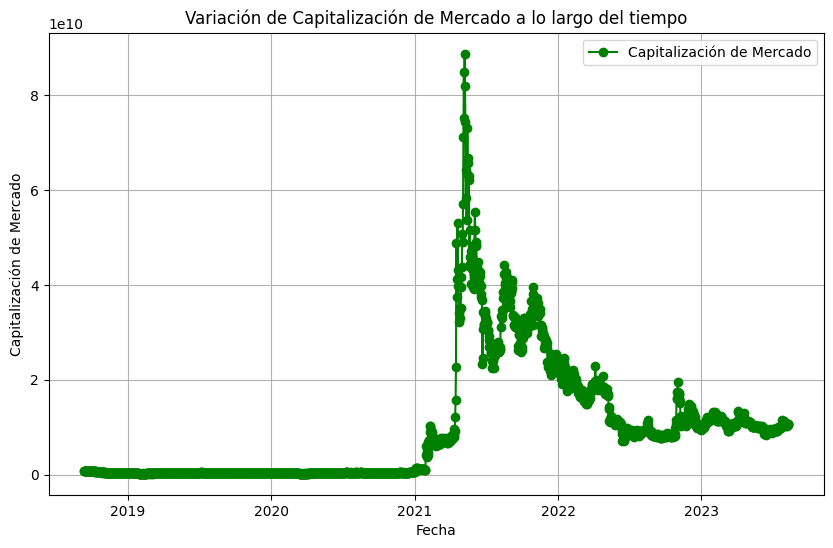

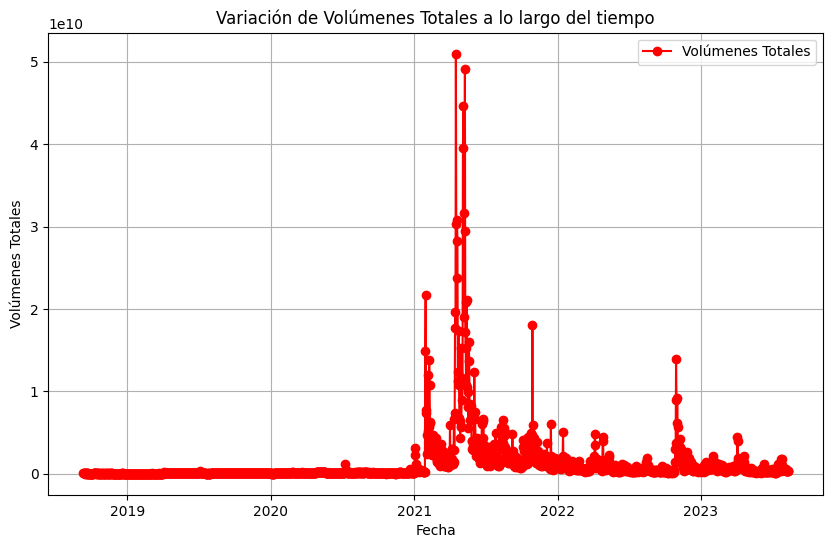

In [24]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('dogecoin_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA ETHEREUM (SIYMBOL ETH) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS
COMPORTAMIENTO MUY PARECIDO AL BITCOIN CON UN PICO DE CRECIMIENTO EN 2021 Y
CON UNA ESTABILIDAD DESDE 2022 A LA FECHA

         id       fecha    prices   market_caps  total_volumes
0  ethereum  2018-09-11  196.3615  1.999540e+10   2.491789e+09
1  ethereum  2018-09-12  184.0822  1.875811e+10   2.596453e+09
2  ethereum  2018-09-13  182.9456  1.864635e+10   2.604495e+09
3  ethereum  2018-09-14  211.8267  2.159395e+10   3.501499e+09
4  ethereum  2018-09-15  211.3836  2.156424e+10   3.131561e+09


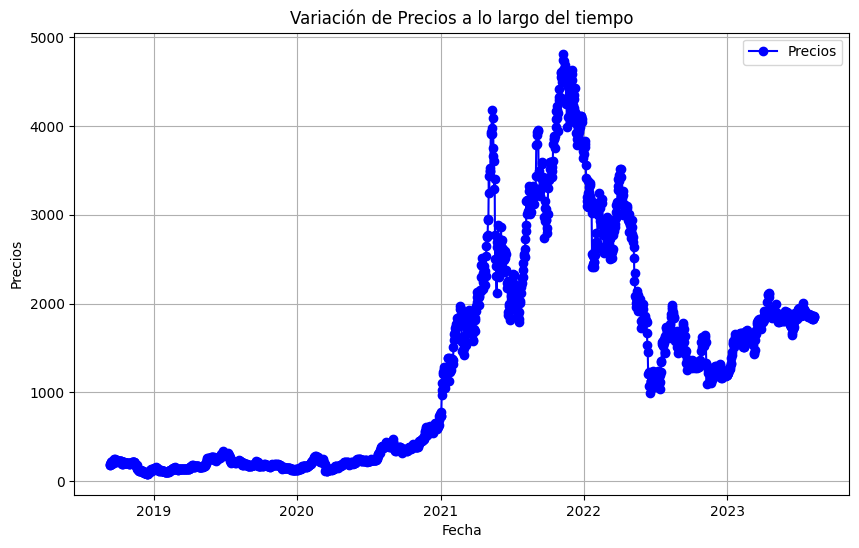

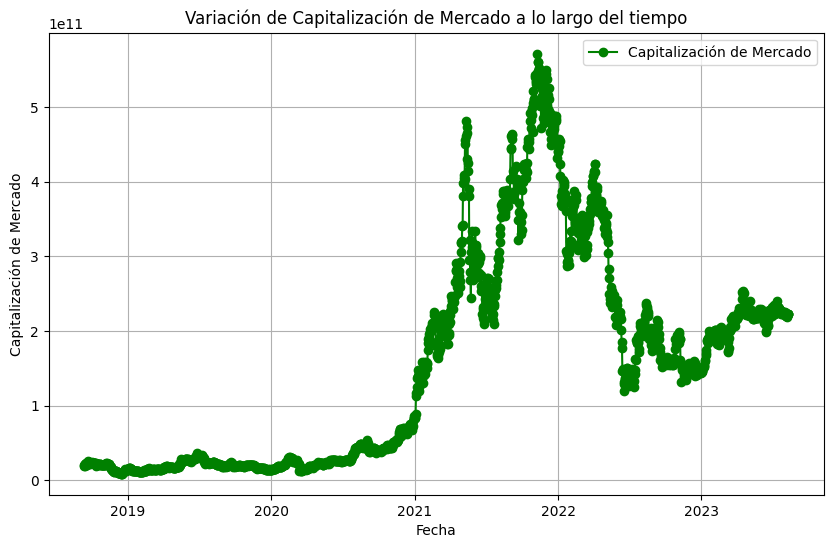

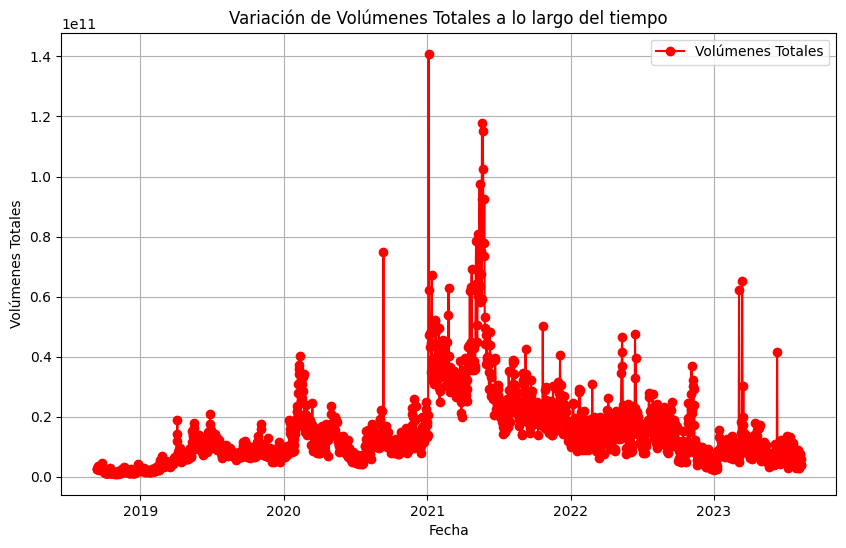

In [19]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('ethereum_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA POLKADOT (SIYMBOL DOT) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS,
EL PICO DEL 2021 MUY COMUN EN TODAS LAS CRIPTOS Y DESDE JULIO DE 2022 
A LA FECHA UN COMPORTAMIENTO MUY ESTABLE

         id       fecha  prices   market_caps  total_volumes
0  polkadot  2020-08-19  2.9367  0.000000e+00   8.241398e+07
1  polkadot  2020-08-20  2.9367  0.000000e+00   8.241398e+07
2  polkadot  2020-08-21  2.8988  0.000000e+00   4.951174e+07
3  polkadot  2020-08-22  2.8719  0.000000e+00   5.123375e+07
4  polkadot  2020-08-23  4.4814  4.028277e+09   4.739210e+08


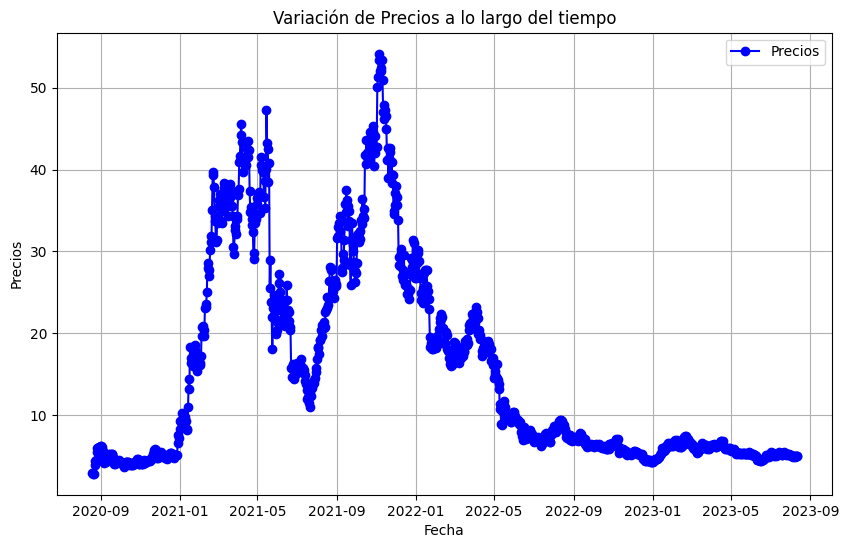

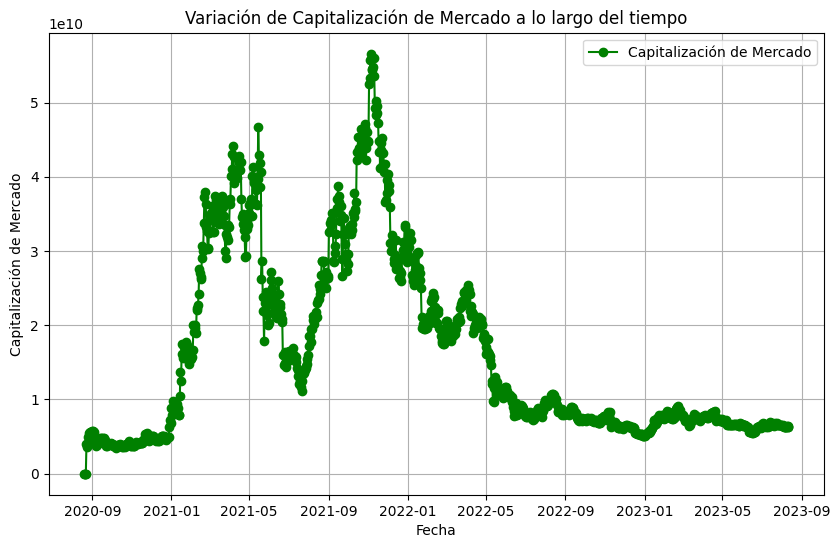

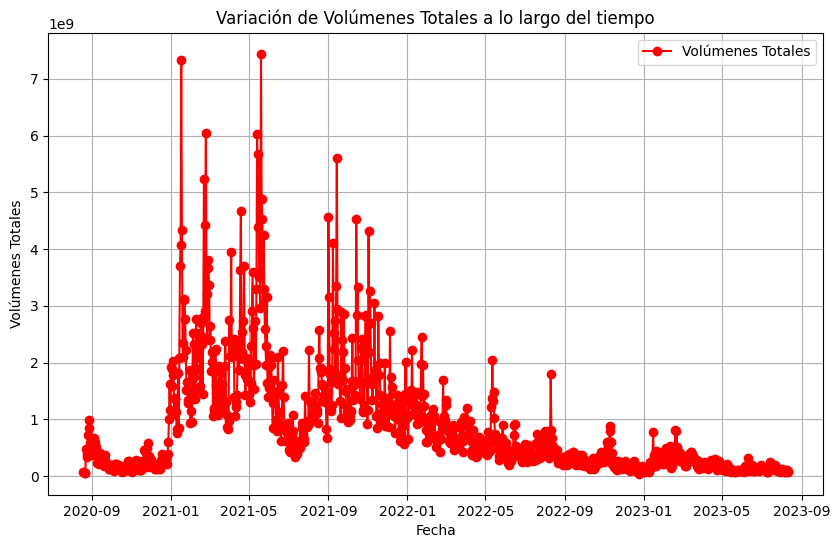

In [25]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('polkadot_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA RIPPLE (SIYMBOL XRP) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS,
LOS PICOS DE 2021 REFLEJAN LA REALIDAD DE LA CRIPTO, MUY SIMILAR
A TODAS LAS CRIPTOS ANALIZADAS Y CON UN COMPORTAMIENTO ESTABLE DESDE JUNIO DE 2022
A LA FECHA.

       id       fecha  prices   market_caps  total_volumes
0  ripple  2018-09-11  0.2688  1.059635e+10   3.021296e+08
1  ripple  2018-09-12  0.2638  1.047944e+10   3.117598e+08
2  ripple  2018-09-13  0.2702  1.072842e+10   3.423275e+08
3  ripple  2018-09-14  0.2808  1.115931e+10   3.638406e+08
4  ripple  2018-09-15  0.2769  1.104103e+10   3.266778e+08


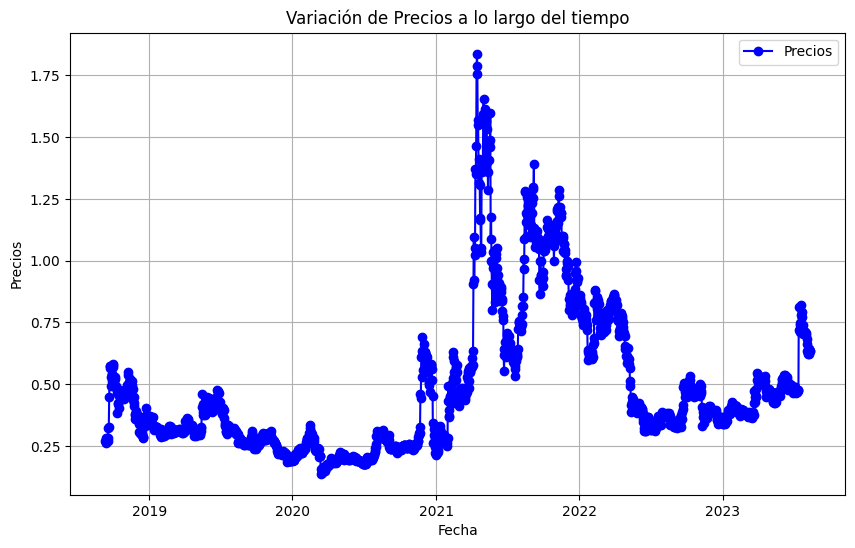

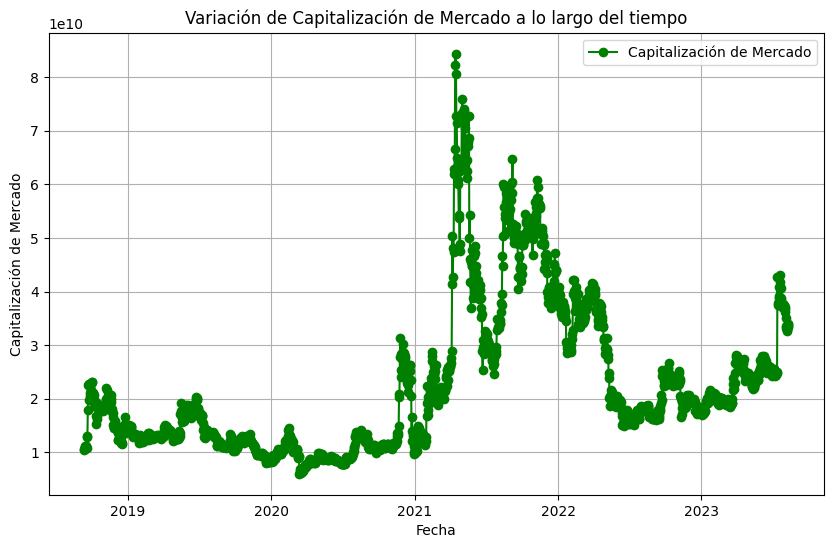

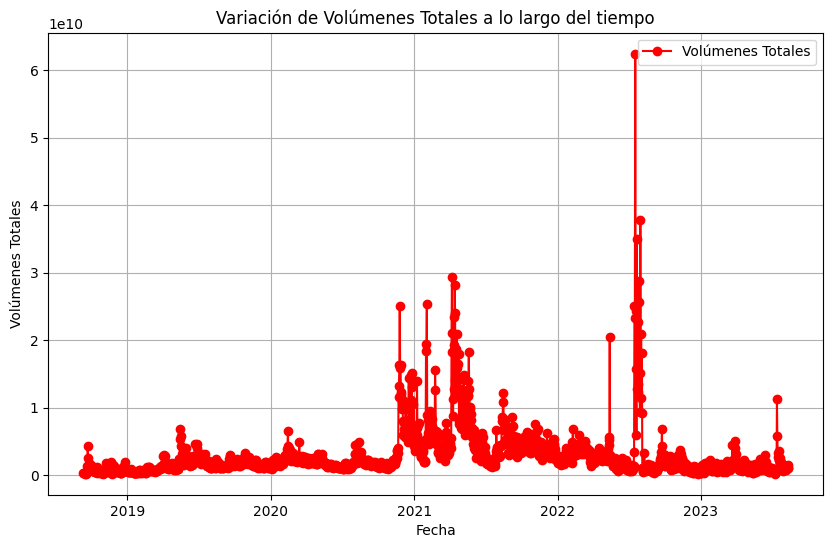

In [26]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('ripple_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA SOLANA (SIYMBOL SOL) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS,
COMPORTAMIENTO ESPERADO, SE APRECIA UN PICO EN 2021 Y DESDE JUNIO DE 2022
A LA FECHA UN COMPORTAMIENTO ESTABLE.

       id       fecha  prices   market_caps  total_volumes
0  solana  2020-04-11  0.9576  7.827652e+06   9.267267e+07
1  solana  2020-04-12  0.7847  6.173608e+06   4.945869e+07
2  solana  2020-04-13  0.8760  7.269680e+06   3.782101e+07
3  solana  2020-04-14  0.7867  6.302364e+06   1.957921e+07
4  solana  2020-04-15  0.6667  5.306221e+06   1.752353e+07


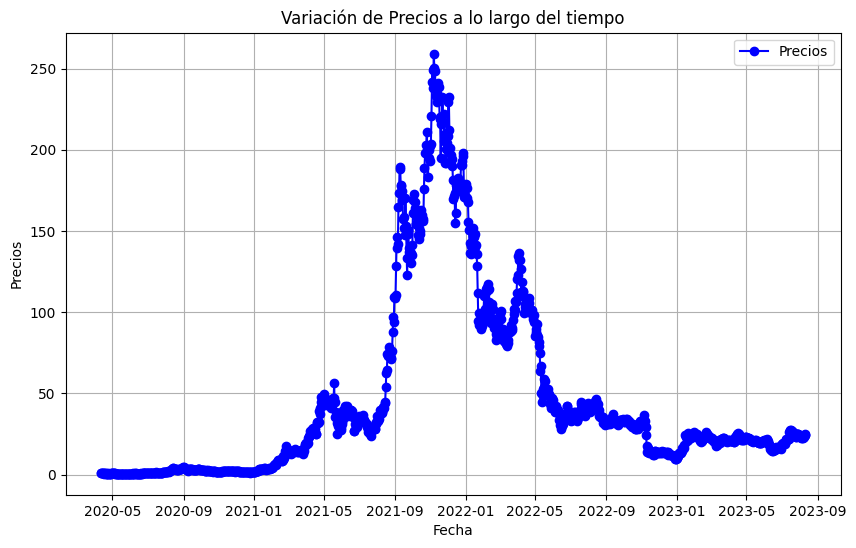

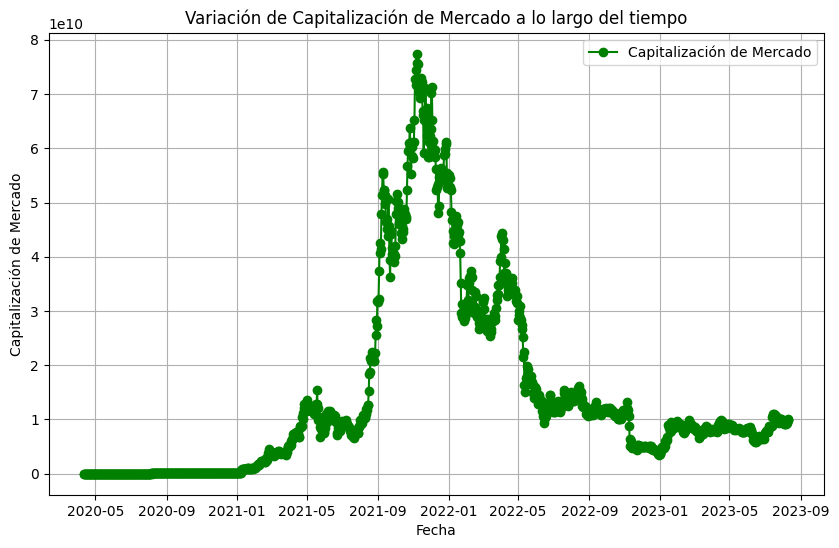

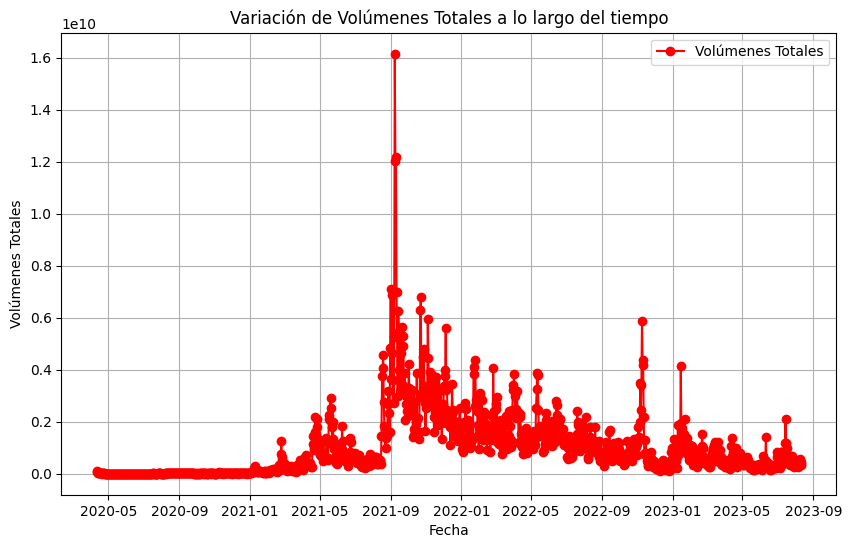

In [27]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('solana_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA TETHER (SIYMBOL USDT) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS,
PRECIO ESTABLE A LO LARGO DEL TIEMPO, CON UN PICO EN VOLUMENES EN 2021, 
Y CON UN ALTO VOLUMEN 

       id       fecha  prices   market_caps  total_volumes
0  tether  2018-09-11  0.9988  2.811552e+09   1.451881e+08
1  tether  2018-09-12  0.9997  2.812137e+09   1.495424e+08
2  tether  2018-09-13  0.9994  2.811472e+09   1.442946e+08
3  tether  2018-09-14  0.9993  2.787130e+09   1.472597e+08
4  tether  2018-09-15  1.0000  2.786121e+09   1.534580e+08


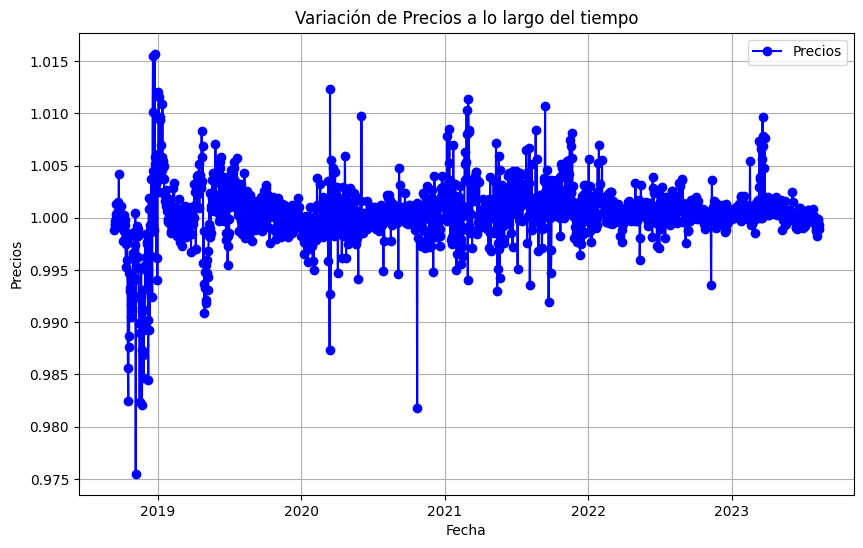

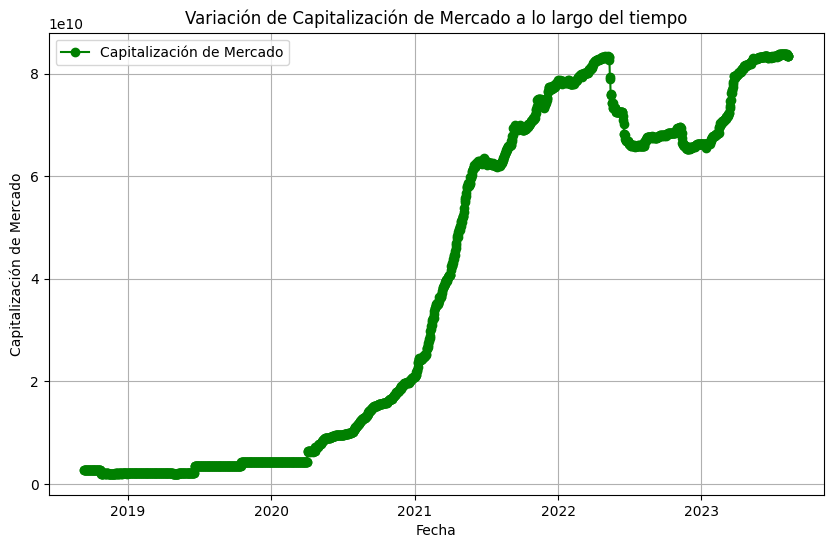

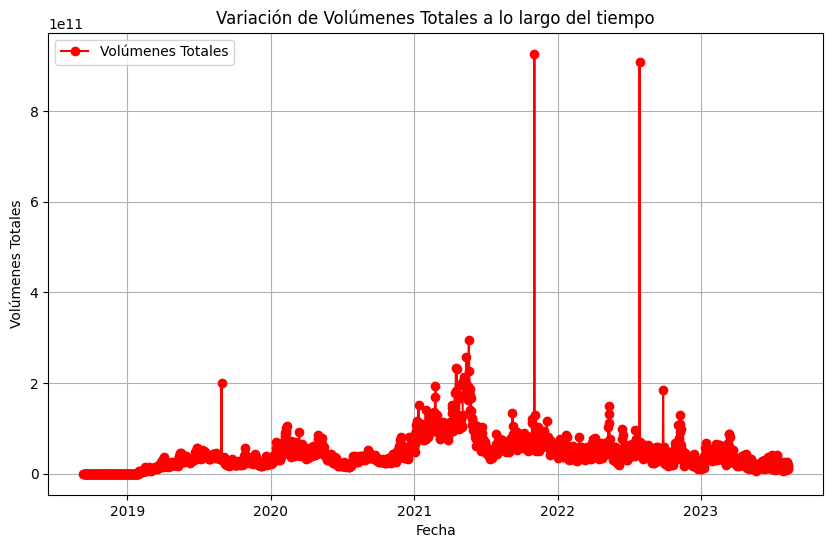

In [28]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('tether_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


EDA PARA LA CRIPTOMONEDA UNISWAP (SIYMBOL UNI) 
SE NOTA UNA INFORMACION LIMPIA CONSISTENTE, SIN OUTLIERS,
REFLEJA UN COMPORTAMIENTO ESTABLE DESDE EL SEGUNDO SEMESTRE DE 2022
Y EL PICO DE 2021 MUY COMUN EN TODAS LAS CRIPTOS ANALIZADAS

        id       fecha  prices   market_caps  total_volumes
0  uniswap  2020-09-17  3.4438  2.199132e+08   1.802085e+09
1  uniswap  2020-09-18  3.4438  2.199132e+08   1.802085e+09
2  uniswap  2020-09-19  7.0977  7.328221e+08   5.688408e+09
3  uniswap  2020-09-20  5.7021  6.472084e+08   2.050756e+09
4  uniswap  2020-09-21  5.2566  6.324213e+08   1.316669e+09


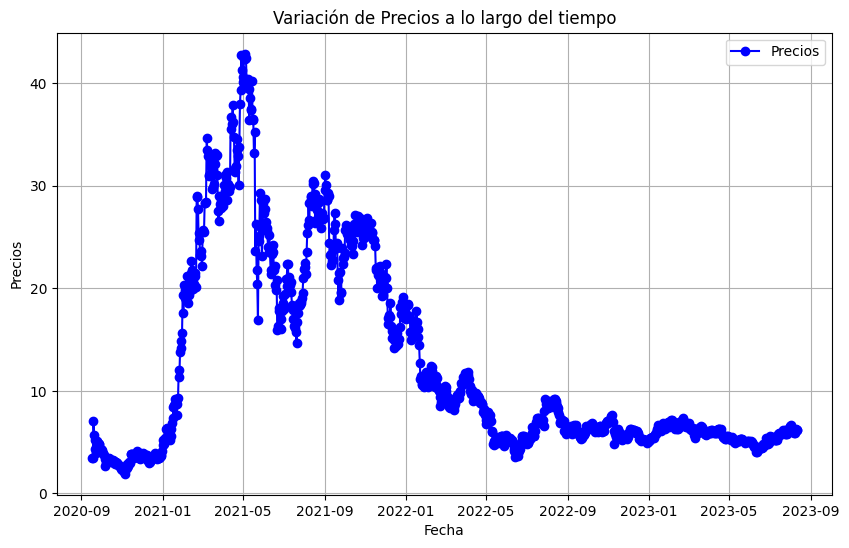

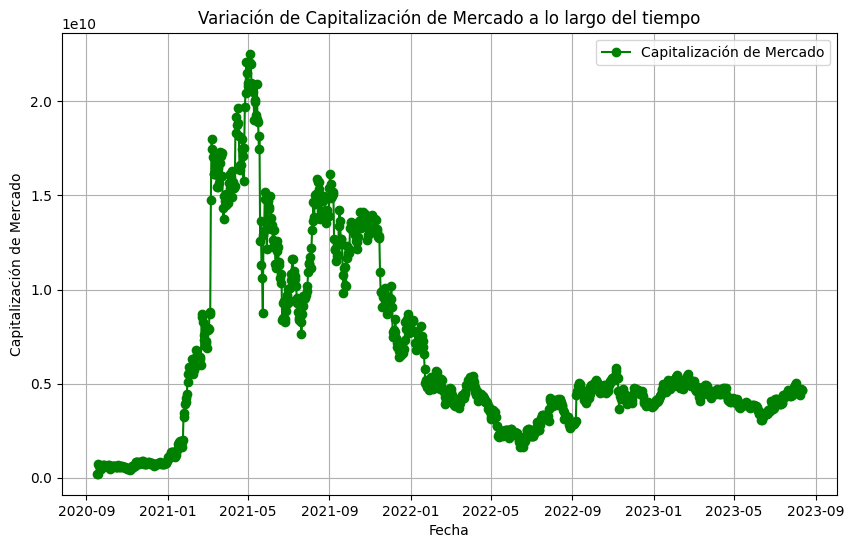

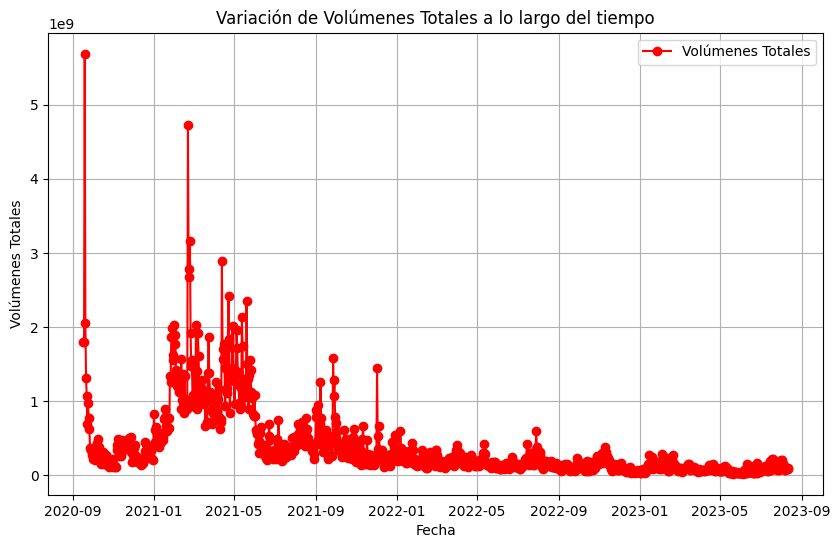

In [13]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('uniswap_m.csv')

# Mostrar una vista previa de los primeros registros en los datos
print(data.head())

# Convertir la columna 'fecha' al tipo de dato 'datetime'
data['fecha'] = pd.to_datetime(data['fecha'])

# Gráfico de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['prices'], marker='o', linestyle='-', color='b', label='Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.title('Variación de Precios a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['market_caps'], marker='o', linestyle='-', color='g', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Variación de Capitalización de Mercado a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de volúmenes totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['fecha'], data['total_volumes'], marker='o', linestyle='-', color='r', label='Volúmenes Totales')
plt.xlabel('Fecha')
plt.ylabel('Volúmenes Totales')
plt.title('Variación de Volúmenes Totales a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


SE CONCATENAN LOS 10 ARCHIVOS CORRESPONDIENTES A LAS CRIPTOMONEDAS

In [ ]:
# Lista de nombres de archivos CSV
archivos = ["bitcoin_m.csv", "binancecoin_m.csv", "cardano_m.csv", "dogecoin_m.csv", "ethereum_m.csv", "polkadot_m.csv", "ripple_m.csv", "solana_m.csv", "tether_m.csv", "uniswap_m.csv"]

# Crear una lista vacía para almacenar los DataFrames de los archivos CSV
dataframes = []

# Leer y cargar los archivos CSV en DataFrames y añadirlos a la lista
for archivo in archivos:
    df_criptos = pd.read_csv(archivo)
    dataframes.append(df)

# Combinar los DataFrames en uno solo
df_criptos = pd.concat(dataframes, ignore_index=True)

# Convertir el DataFrame a formato JSON
json_data = df_criptos.to_json(orient='records')

# Especificar el nombre del archivo JSON
nombre_archivo_json = 'criptos_j.json'

# Guardar el archivo JSON
with open(nombre_archivo_json, 'w') as archivo_json:
    archivo_json.write(json_data)



SE CREA LA LISTA DE CRIPTOMONEDAS QUE CONTENGA ID, SYMBOL Y NAME
DESDE EL ARCHIVO DE DESCRIPCION DE CRPTOMONEDAS DE LA API COINGECKO

In [ ]:
json_filename = 'lista_monedas.json'

with open(json_filename, 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir del JSON
df_monedas = pd.DataFrame(data)

# Eliminar las columnas "platforms", no es necesaria para el analisis
columnas_a_eliminar = ["platforms"]
df_monedas = df_monedas.drop(columnas_a_eliminar, axis=1)


In [ ]:
print("despues",df_monedas)

SE SELECCIONAN DEL TOTAL DE MONEDAS LAS 10 ESCOGIDAS PARA EL ANALISIS
Y SE CREA EL ARCHIVO lista_monedas.csv CON LAS CRIPTOMONEDAS A ANALIZAR

In [ ]:
# Lista de IDs que se van a seleccionar
ids_seleccionados = ['bitcoin', 'ethereum', 'binancecoin', 'cardano', 'solana', 'polkadot', 'uniswap', 'tether', 'ripple', 'dogecoin']

# Seleccionar las filas correspondientes a los IDs seleccionados
df_seleccionado = df_monedas[df_monedas['id'].isin(ids_seleccionados)]

nombre_archivo = 'lista_monedas.csv'
df_seleccionado.to_csv(nombre_archivo, index=False)

In [ ]:
print(df_seleccionado)

In [ ]:
print(" Mostrar el DataFrame combinado")
print(df_criptos)

print(f'Archivo JSON "{nombre_archivo_json}" guardado correctamente.')

# Mostrar el JSON resultante
print(json_data)